In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [2]:
df = pd.read_csv("primary-experts.csv")

In [3]:
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,SwitchAutoEncoder-0.activation_dim,SwitchAutoEncoder-0.auxk_alpha,...,SwitchAutoEncoder-1/frac_variance_explained,SwitchAutoEncoder-1/l0,SwitchAutoEncoder-1/l1_loss,SwitchAutoEncoder-1/l2_loss,SwitchAutoEncoder-1/l2_ratio,SwitchAutoEncoder-1/loss,SwitchAutoEncoder-1/loss_original,SwitchAutoEncoder-1/loss_reconstructed,SwitchAutoEncoder-1/loss_zero,SwitchAutoEncoder-1/mse_loss
0,leafy-frost-5,finished,-,NaN,NaN,2024-07-13T06:09:56.000Z,44661,NaN,768,0.03125,...,0.987187,344.849121,932.871826,31.138887,0.964003,1024.915039,3.269921,3.363952,17.599813,1037.333252
1,winter-moon-4,finished,-,NaN,NaN,2024-07-13T06:09:42.000Z,44679,NaN,768,0.03125,...,0.982899,234.941040,667.914429,35.963772,0.951675,1366.359131,3.269921,3.427041,17.599813,1384.425781
2,likely-aardvark-3,finished,-,NaN,NaN,2024-07-13T06:09:22.000Z,43728,NaN,768,0.03125,...,0.978750,158.956055,509.130798,40.078201,0.939175,1695.315552,3.269921,3.525979,17.599813,1720.351807
3,genial-dawn-2,finished,-,NaN,NaN,2024-07-13T06:09:08.000Z,46116,NaN,768,0.03125,...,0.967352,137.642090,417.481842,49.772610,0.905209,2604.933105,3.269921,3.956659,17.599813,2643.108887


In [4]:
patterns = ['effective_l0$', 'experts$', 'heaviside$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$']

In [5]:
filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
df = df[filtered_columns]

In [6]:
df

,SwitchAutoEncoder-0.experts,SwitchAutoEncoder-0.heaviside,SwitchAutoEncoder-1.experts,SwitchAutoEncoder-1.heaviside,SwitchAutoEncoder-0/effective_l0,SwitchAutoEncoder-0/frac_recovered,SwitchAutoEncoder-0/loss_original,SwitchAutoEncoder-0/loss_reconstructed,SwitchAutoEncoder-0/mse_loss,SwitchAutoEncoder-1/effective_l0,SwitchAutoEncoder-1/frac_recovered,SwitchAutoEncoder-1/loss_original,SwitchAutoEncoder-1/loss_reconstructed,SwitchAutoEncoder-1/mse_loss
0,16,False,16,True,128,0.995418,3.330375,3.394681,856.461426,128,0.993438,3.269921,3.363952,1037.333252
1,16,False,16,True,64,0.991871,3.330375,3.444457,1118.012695,64,0.989036,3.269921,3.427041,1384.425781
2,16,False,16,True,32,0.986977,3.330375,3.513142,1412.866211,32,0.982131,3.269921,3.525979,1720.351807
3,16,False,16,True,8,0.960511,3.330375,3.884566,2345.244385,8,0.952077,3.269921,3.956659,2643.108887


In [7]:
df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]

In [8]:
df

,experts,heaviside,experts,heaviside,effective_l0,frac_recovered,loss_original,loss_reconstructed,mse_loss,effective_l0,frac_recovered,loss_original,loss_reconstructed,mse_loss
0,16,False,16,True,128,0.995418,3.330375,3.394681,856.461426,128,0.993438,3.269921,3.363952,1037.333252
1,16,False,16,True,64,0.991871,3.330375,3.444457,1118.012695,64,0.989036,3.269921,3.427041,1384.425781
2,16,False,16,True,32,0.986977,3.330375,3.513142,1412.866211,32,0.982131,3.269921,3.525979,1720.351807
3,16,False,16,True,8,0.960511,3.330375,3.884566,2345.244385,8,0.952077,3.269921,3.956659,2643.108887


In [9]:
l0 = df["effective_l0"].to_numpy().flatten()
mse_loss = df["mse_loss"].to_numpy().flatten()
frac_recovered = df["frac_recovered"].to_numpy().flatten()
loss_original = df["loss_original"].to_numpy().flatten()
loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
experts = df["experts"].to_numpy().flatten()
heaviside = df["heaviside"].to_numpy().flatten()

In [10]:
data = np.array([experts, heaviside, l0, mse_loss, frac_recovered, loss_original, loss_reconstructed]).T
df = pd.DataFrame(data, columns=['experts', 'heaviside', 'l0', 'mse_loss', 'frac_recovered', 'loss_original', 'loss_reconstructed'])
df = df.sort_values(by='l0')

In [11]:
df

,experts,heaviside,l0,mse_loss,frac_recovered,loss_original,loss_reconstructed
6,16.0,0.0,8.0,2345.244385,0.960511,3.330375,3.884566
7,16.0,1.0,8.0,2643.108887,0.952077,3.269921,3.956659
4,16.0,0.0,32.0,1412.866211,0.986977,3.330375,3.513142
5,16.0,1.0,32.0,1720.351807,0.982131,3.269921,3.525979
2,16.0,0.0,64.0,1118.012695,0.991871,3.330375,3.444457
3,16.0,1.0,64.0,1384.425781,0.989036,3.269921,3.427041
0,16.0,0.0,128.0,856.461426,0.995418,3.330375,3.394681
1,16.0,1.0,128.0,1037.333252,0.993438,3.269921,3.363952


In [12]:
df['delta_ce'] = df['loss_reconstructed'] - df['loss_original']

In [16]:
df16s = df[(df['experts'] == 16) & (df['heaviside'] == 0)]
df16h = df[(df['experts'] == 16) & (df['heaviside'] == 1)]

In [17]:
df16s.to_csv("experts16s.csv")
df16h.to_csv("experts16h.csv")

## Plotting

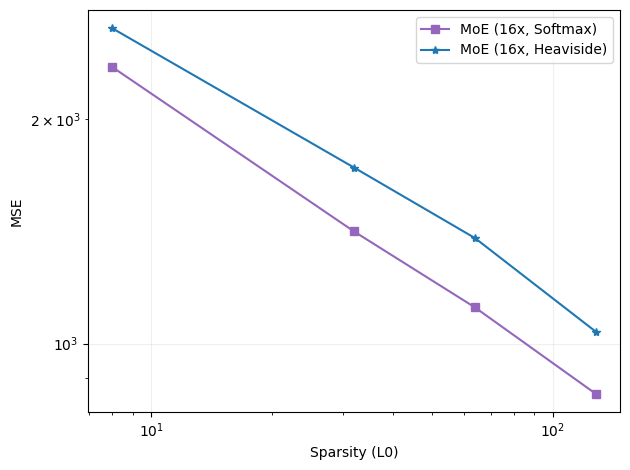

In [18]:
plt.plot(df16s['l0'], df16s['mse_loss'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['mse_loss'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_mse.png")
plt.show()

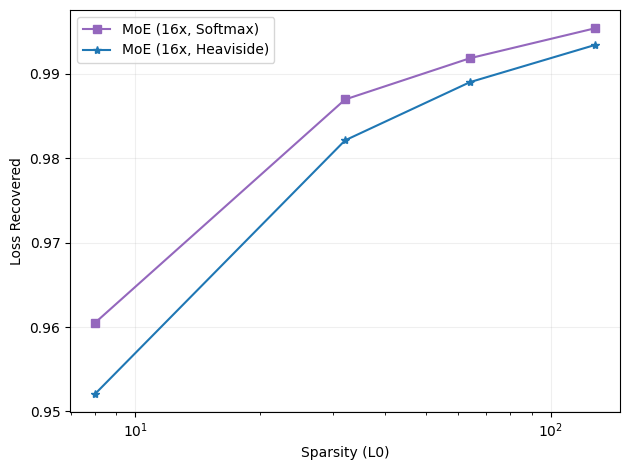

In [19]:
plt.plot(df16s['l0'], df16s['frac_recovered'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['frac_recovered'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')


plt.xscale('log')
#plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_lossrec.png")
plt.show()

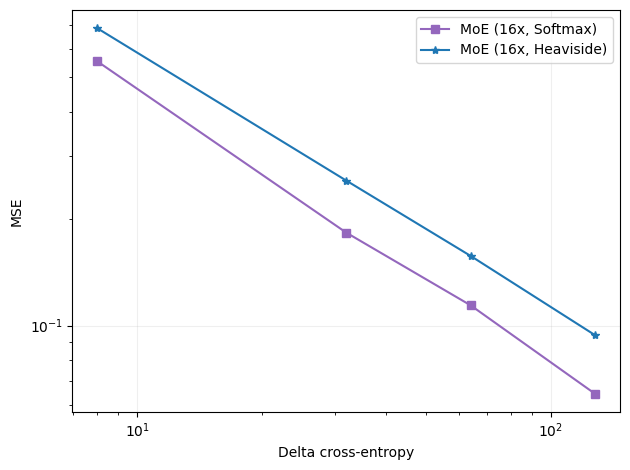

In [20]:
plt.plot(df16s['l0'], df16s['delta_ce'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['delta_ce'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Delta cross-entropy")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_deltace.png")
plt.show()